In [1]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import r2_score, roc_auc_score, roc_curve
import pandas as pd
import numpy as np
import pygal as pg
from pandas.io.json import json_normalize

In [2]:
df = pd.read_csv('/home/angeles/Documentos/Diplomado_DS/Modulo_2/OnlineNewsPopularity.csv')

FileNotFoundError: [Errno 2] File b'/home/angeles/Documentos/Diplomado_DS/Modulo_2/OnlineNewsPopularity.csv' does not exist: b'/home/angeles/Documentos/Diplomado_DS/Modulo_2/OnlineNewsPopularity.csv'

In [3]:
df

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.700000,-0.350000,-0.600000,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.700000,-0.118750,-0.125000,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.000000,-0.466667,-0.800000,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.800000,-0.369697,-0.600000,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.000000,-0.220192,-0.500000,-0.050000,0.454545,0.136364,0.045455,0.136364,505
5,http://mashable.com/2013/01/07/beewi-smart-toys/,731.0,10.0,370.0,0.559889,1.0,0.698198,2.0,2.0,0.0,...,0.136364,0.600000,-0.195000,-0.400000,-0.100000,0.642857,0.214286,0.142857,0.214286,855
6,http://mashable.com/2013/01/07/bodymedia-armba...,731.0,8.0,960.0,0.418163,1.0,0.549834,21.0,20.0,20.0,...,0.100000,1.000000,-0.224479,-0.500000,-0.050000,0.000000,0.000000,0.500000,0.000000,556
7,http://mashable.com/2013/01/07/canon-poweshot-n/,731.0,12.0,989.0,0.433574,1.0,0.572108,20.0,20.0,20.0,...,0.100000,1.000000,-0.242778,-0.500000,-0.050000,1.000000,0.500000,0.500000,0.500000,891
8,http://mashable.com/2013/01/07/car-of-the-futu...,731.0,11.0,97.0,0.670103,1.0,0.836735,2.0,0.0,0.0,...,0.400000,0.800000,-0.125000,-0.125000,-0.125000,0.125000,0.000000,0.375000,0.000000,3600
9,http://mashable.com/2013/01/07/chuck-hagel-web...,731.0,10.0,231.0,0.636364,1.0,0.797101,4.0,1.0,1.0,...,0.100000,0.500000,-0.238095,-0.500000,-0.100000,0.000000,0.000000,0.500000,0.000000,710


In [4]:
var_cont = ['timedelta', 'n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'n_non_stop_words', 
           'n_non_stop_unique_tokens', 'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos', 
           'average_token_length', 'num_keywords', 'kw_min_min', 'kw_max_min', 'kw_avg_min', 
           'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg', 
           'self_reference_min_shares', 'self_reference_max_shares', 'self_reference_avg_sharess', 
           'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity', 
           'global_sentiment_polarity', 'global_rate_positive_words', 'global_rate_negative_words',
           'rate_positive_words', 'rate_negative_words', 'avg_positive_polarity', 'min_positive_polarity',
           'max_positive_polarity', 'avg_negative_polarity', 'min_negative_polarity', 
           'max_negative_polarity', 'title_subjectivity', 'title_sentiment_polarity', 
           'abs_title_subjectivity', 'abs_title_sentiment_polarity']

In [5]:
var_disc = ['data_channel_is_lifestyle', 'data_channel_is_entertainment', 'data_channel_is_bus', 
           'data_channel_is_socmed', 'data_channel_is_tech', 'data_channel_is_world', 'weekday_is_monday',
           'weekday_is_tuesday', 'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
           'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend']

In [6]:
df.columns = [x.strip() for x in df.columns]

In [7]:
df[['shares']].sample(5)

,shares
37892,623
33810,1700
3412,897
38486,1300
37465,1900


## Regresión Lineal

In [8]:
mr = LinearRegression()
mr.fit(X = df[var_cont], y = df['shares'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
df["y_hat"] = mr.predict(X = df[var_cont])
df[["shares", "y_hat"]].head()

,shares,y_hat
0,593,-245.539621
1,711,-806.713086
2,1500,742.545163
3,1200,-434.420744
4,505,-294.709800


In [10]:
def IQR(df, col, range_=2, q1=75, q3=100):
    q_1,q_3=np.percentile(df[col],[q1,q3])
    left=q_1-range_*(q_3-q_1)
    rigth=q_3+range_*(q_3-q_1)
    return df[(df[col]>=left)&(df[col]<=rigth)]

In [11]:
def percentil_outliers(df,col,p_i=0,p_f=95):
    q_i,q_f=np.percentile(df[col],[p_i,p_f])
    return df[(df[col]>=q_i)&(df[col]<=q_f)]

In [12]:
def mean_std_outliers(df,col,n_sigma=3):
    mean=df[col].mean()
    std=df[col].std()
    left=mean-n_sigma*std
    rigth=mean+n_sigma*std
    return df[(df[col]>=left)&(df[col]<=rigth)]

In [13]:
df[var_cont].describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.353825,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.104542,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.306244,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.358755,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.411428,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000


In [14]:
dc=[]
df_aux = {}
df_aux_o = pd.DataFrame()
for col in var_cont:
    #print(col)
    per=percentil_outliers(df,col,p_i=0,p_f=99)
    #plot_hist2(data=per[col], path= path3, name=f'per_{col}')
    
    mean_df=mean_std_outliers(df,col,n_sigma=3)
    #if mean_df.shape[0]== 36548:
    #    df_final = mean_df
    df_aux.update({f'mean_{col}': list(mean_df[col])})
    df_aux_o[f'mean_{col}'] = mean_df[col]
    #plot_hist2(data=mean_df[col], path= path3, name=f'mean_std_{col}')
    
    iqr=IQR(df,col,range_=3,q1=25,q3=75)
    if iqr.shape[0] == 30204:
        df_final = iqr
    #plot_hist2(data=iqr[col], path= path3, name=f'iqr_{col}')
    
    dc.append({'variable':col,'original':len(df[col]),'meth_1_percentil':len(per),'meth_2_mean_std':len(mean_df),'meth_3_IQR':len(iqr)})

In [15]:
df_aux_out = json_normalize(dc)
df_aux_out

,variable,original,meth_1_percentil,meth_2_mean_std,meth_3_IQR
0,timedelta,39644,39289,39644,39644
1,n_tokens_title,39644,39263,39488,39643
2,n_tokens_content,39644,39247,38951,39126
3,n_unique_tokens,39644,39247,39643,38462
4,n_non_stop_words,39644,39248,39643,38151
5,n_non_stop_unique_tokens,39644,39247,39643,38408
6,num_hrefs,39644,39265,38913,38913
7,num_self_hrefs,39644,39272,38945,38861
8,num_imgs,39644,39260,38781,35581
9,num_videos,39644,39271,38658,37470


In [16]:
df_final.shape

(30204, 62)

In [17]:
mr2 = LinearRegression()
mr2.fit(X = df_final[var_cont], y = df_final['shares'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
df_final["y_hat"] = mr2.predict(X = df_final[var_cont])

/home/angeles/virtaulenvs/DataScience/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


#### 1.- Ajuste la Regresión Lineal 

In [19]:
mr.score(df[var_cont], df['shares'])

0.022581754024665224

In [20]:
r2_score(df['shares'], df['y_hat'])

0.022581754024665224

In [21]:
pema = (abs(df['shares'] - df['y_hat'])/df['shares'])*(1/df.shape[0])

In [22]:
sum(pema)

1.9127664846919363

In [23]:
mr2.score(df_final[var_cont], df_final['shares'])

0.03270577825841958

In [24]:
r2_score(df_final['shares'], df_final['y_hat'])

0.03270577825841958

In [25]:
pema = (abs(df_final['shares'] - df_final['y_hat'])/df_final['shares'])*(1/df_final.shape[0])

In [26]:
sum(pema)

1.9591790846763268

In [27]:
kb = SelectKBest(k=5, score_func=f_regression)
kb.fit(X=df_final[var_cont], y=df_final["shares"])
k_best = [x for x, y in zip([x for x in df_final.columns if x != "shares"], kb.get_support()) if y]
k_best

/home/angeles/virtaulenvs/DataScience/local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/home/angeles/virtaulenvs/DataScience/local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/home/angeles/virtaulenvs/DataScience/local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/angeles/virtaulenvs/DataScience/local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/angeles/virtaulenvs/DataScience/local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  

['kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_max_max', 'kw_avg_avg']

In [28]:
[(x,y) for x,y in zip(k_best,mr.coef_)]

[('kw_min_min', 1.7784121234904138),
 ('kw_max_min', 104.89866779723667),
 ('kw_avg_min', 0.5398372364304423),
 ('kw_max_max', 3805.882067126665),
 ('kw_avg_avg', -2063.729606752404)]

In [29]:
mr2.fit(X = df_final[k_best], y = df_final['shares'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
mr2.score(df_final[k_best], df_final['shares'])

0.018884550897746544

#### Construya una variable objetivo discreta en función de la original. 

In [31]:
df["tgt"] = (df["shares"] > df["shares"].mean()).astype(int)

In [32]:
df["tgt"].mean()

0.20378871960447986

## Regresión logistica

In [33]:
lr = LogisticRegression(n_jobs=-1)
lr.fit(X=df[var_cont], y=df['tgt'])

/home/angeles/virtaulenvs/DataScience/local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/angeles/virtaulenvs/DataScience/local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=-1, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
df["y_hat2"] = lr.predict(X = df[var_cont])
df[['tgt', 'y_hat2']].sample(5)

,tgt,y_hat2
39402,0,0
26358,0,0
32581,0,0
39524,0,0
31401,0,0


In [53]:
df['y'] = (df['tgt'] == df['y_hat2']) * 1
df.y.sum()

31502

#### 2.- Ajuste la Regresión Logistica 

In [36]:
lr.score(df[var_cont], df['tgt'])

0.7961608313994551

In [37]:
roc_auc_score(y_true=df['tgt'], y_score=lr.predict(X=df[var_cont]))

0.5098227022253143

## Credit Scoring

In [38]:
df.shape

(39644, 65)

In [39]:
for var in var_cont:
    df[f"C_{var}"] = pd.cut(df[var], bins=5).astype(str)

In [40]:
df.columns

Index(['url', 'timedelta', 'n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs',
       ...
       'C_avg_positive_polarity', 'C_min_positive_polarity',
       'C_max_positive_polarity', 'C_avg_negative_polarity',
       'C_min_negative_polarity', 'C_max_negative_polarity',
       'C_title_subjectivity', 'C_title_sentiment_polarity',
       'C_abs_title_subjectivity', 'C_abs_title_sentiment_polarity'],
      dtype='object', length=110)

In [41]:
def IV(df, var, tgt):
    aux = df[[var, tgt]].groupby(var).agg(["count", "sum"])
    aux["evento"] = aux[tgt, "sum"]
    aux["no_evento"] = aux[tgt, "count"] - aux[tgt, "sum"]
    aux["%evento"] = aux["evento"] / aux["evento"].sum()
    aux["%no_evento"] = aux["no_evento"] / aux["no_evento"].sum()
    aux["WOE"] = np.log(aux["%no_evento"] / aux["%evento"])
    aux["IV"] = (aux["%no_evento"] - aux["%evento"])*aux["WOE"]
    return aux["IV"].sum()

In [42]:
new_disc = [x for x in df.columns if x.startswith("C_")] + var_disc

In [43]:
df_iv = pd.DataFrame(columns=["iv"])
for var in new_disc:
    df_iv.loc[var, "iv"] = IV(df = df, var = var, tgt = 'tgt')

/home/angeles/virtaulenvs/DataScience/local/lib/python3.6/site-packages/pandas/core/series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [44]:
df_iv.sort_values(by = "iv", ascending=False)

,iv
C_kw_max_max,inf
C_n_unique_tokens,inf
C_n_non_stop_words,inf
C_n_non_stop_unique_tokens,inf
C_num_hrefs,inf
C_num_self_hrefs,inf
C_self_reference_max_shares,inf
C_kw_max_avg,inf
C_kw_min_min,inf
C_kw_min_avg,0.132871


In [45]:
ls_best = df_iv[(df_iv["iv"] != np.inf)].index.tolist()

In [46]:
def WOE(df, var, tgt):
    aux = df[[var, tgt]].groupby(var).agg(["count", "sum"])
    aux["evento"] = aux[tgt, "sum"]
    aux["no_evento"] = aux[tgt, "count"] - aux[tgt, "sum"]
    aux["%evento"] = aux["evento"] / aux["evento"].sum()
    aux["%no_evento"] = aux["no_evento"] / aux["no_evento"].sum()
    aux["WOE"] = np.log(aux["%no_evento"] / aux["%evento"])
    aux.columns = aux.columns.droplevel(1)
    aux = aux[["WOE"]].reset_index().rename(columns={"WOE": f"W_{var}"})
    df = df.merge(aux, on = var, how = "left")
    display(aux)
    return df

In [47]:
for col in ls_best:
    df = WOE(df = df, var = col, tgt = 'tgt')

,C_timedelta,W_C_timedelta
0,"(152.6, 297.2]",0.012793
1,"(297.2, 441.8]",-0.222218
2,"(441.8, 586.4]",0.018914
3,"(586.4, 731.0]",-0.033099
4,"(7.277, 152.6]",0.190556


,C_n_tokens_title,W_C_n_tokens_title
0,"(1.979, 6.2]",-0.169368
1,"(10.4, 14.6]",0.036852
2,"(14.6, 18.8]",0.077581
3,"(18.8, 23.0]",-0.669634
4,"(6.2, 10.4]",-0.026528


,C_n_tokens_content,W_C_n_tokens_content
0,"(-8.474, 1694.8]",0.008362
1,"(1694.8, 3389.6]",-0.236141
2,"(3389.6, 5084.4]",-0.694951
3,"(5084.4, 6779.2]",0.428979
4,"(6779.2, 8474.0]",-0.851955


,C_num_imgs,W_C_num_imgs
0,"(-0.128, 25.6]",0.008369
1,"(102.4, 128.0]",-0.264169
2,"(25.6, 51.2]",-0.204945
3,"(51.2, 76.8]",-0.557156
4,"(76.8, 102.4]",-0.764944


,C_num_videos,W_C_num_videos
0,"(-0.091, 18.2]",0.002299
1,"(18.2, 36.4]",-0.076771
2,"(36.4, 54.6]",-0.995056
3,"(54.6, 72.8]",-0.851955
4,"(72.8, 91.0]",-0.351180


,C_average_token_length,W_C_average_token_length
0,"(-0.00804, 1.608]",-0.423857
1,"(3.217, 4.825]",-0.039639
2,"(4.825, 6.433]",0.153940
3,"(6.433, 8.042]",-0.110018


,C_num_keywords,W_C_num_keywords
0,"(0.991, 2.8]",0.788981
1,"(2.8, 4.6]",0.375154
2,"(4.6, 6.4]",0.103345
3,"(6.4, 8.2]",-0.059572
4,"(8.2, 10.0]",-0.120998


,C_kw_max_min,W_C_kw_max_min
0,"(-298.4, 59680.0]",0.000173
1,"(119360.0, 179040.0]",-0.264169
2,"(238720.0, 298400.0]",-1.362781
3,"(59680.0, 119360.0]",-0.110018


,C_kw_avg_min,W_C_kw_avg_min
0,"(-43.829, 8564.771]",0.000141
1,"(17130.543, 25696.314]",-1.362781
2,"(25696.314, 34262.086]",-1.362781
3,"(34262.086, 42827.857]",-0.669634
4,"(8564.771, 17130.543]",0.246657


,C_kw_min_max,W_C_kw_min_max
0,"(-843.3, 168660.0]",0.000160
1,"(168660.0, 337320.0]",-0.046166
2,"(337320.0, 505980.0]",-1.075099
3,"(505980.0, 674640.0]",-0.194210
4,"(674640.0, 843300.0]",0.317753


,C_kw_avg_max,W_C_kw_avg_max
0,"(-843.3, 168660.0]",0.049657
1,"(168660.0, 337320.0]",0.105145
2,"(337320.0, 505980.0]",-0.231705
3,"(505980.0, 674640.0]",-0.363158
4,"(674640.0, 843300.0]",-0.209360


,C_kw_min_avg,W_C_kw_min_avg
0,"(-4.614, 721.808]",0.041803
1,"(1444.616, 2167.424]",0.170507
2,"(2167.424, 2890.232]",-0.333584
3,"(2890.232, 3613.04]",-0.739057
4,"(721.808, 1444.616]",0.643032


,C_kw_avg_avg,W_C_kw_avg_avg
0,"(-43.568, 8713.532]",0.003802
1,"(17427.064, 26140.596]",-1.496312
2,"(26140.596, 34854.128]",0.023514
3,"(34854.128, 43567.66]",-1.362781
4,"(8713.532, 17427.064]",-0.611365


,C_self_reference_min_shares,W_C_self_reference_min_shares
0,"(-843.3, 168660.0]",0.001378
1,"(168660.0, 337320.0]",-1.496312
2,"(505980.0, 674640.0]",-0.756645
3,"(674640.0, 843300.0]",-0.851955


,C_self_reference_avg_sharess,W_C_self_reference_avg_sharess
0,"(-843.3, 168660.0]",0.002214
1,"(168660.0, 337320.0]",-0.593648
2,"(337320.0, 505980.0]",-0.803165
3,"(505980.0, 674640.0]",-0.756645
4,"(674640.0, 843300.0]",-0.851955


,C_LDA_00,W_C_LDA_00
0,"(-0.000927, 0.185]",0.011918
1,"(0.185, 0.371]",-0.016082
2,"(0.371, 0.556]",-0.007132
3,"(0.556, 0.742]",-0.018951
4,"(0.742, 0.927]",-0.067952


,C_LDA_01,W_C_LDA_01
0,"(-0.000926, 0.185]",-0.022571
1,"(0.185, 0.37]",-0.009335
2,"(0.37, 0.556]",0.067230
3,"(0.556, 0.741]",0.090879
4,"(0.741, 0.926]",0.282498


,C_LDA_02,W_C_LDA_02
0,"(-0.00092, 0.184]",-0.172230
1,"(0.184, 0.368]",-0.000108
2,"(0.368, 0.552]",0.207351
3,"(0.552, 0.736]",0.676312
4,"(0.736, 0.92]",0.944292


,C_LDA_03,W_C_LDA_03
0,"(-0.000927, 0.185]",0.218856
1,"(0.185, 0.371]",-0.110611
2,"(0.371, 0.556]",-0.434342
3,"(0.556, 0.741]",-0.475919
4,"(0.741, 0.927]",-0.437495


,C_LDA_04,W_C_LDA_04
0,"(-0.000927, 0.185]",-0.004098
1,"(0.185, 0.371]",0.110264
2,"(0.371, 0.556]",0.027040
3,"(0.556, 0.742]",-0.016534
4,"(0.742, 0.927]",-0.089558


,C_global_subjectivity,W_C_global_subjectivity
0,"(-0.001, 0.2]",-0.363063
1,"(0.2, 0.4]",0.409462
2,"(0.4, 0.6]",-0.054803
3,"(0.6, 0.8]",-0.551665
4,"(0.8, 1.0]",-0.168858


,C_global_sentiment_polarity,W_C_global_sentiment_polarity
0,"(-0.169, 0.0549]",0.110070
1,"(-0.395, -0.169]",-0.720927
2,"(0.0549, 0.279]",-0.018339
3,"(0.279, 0.504]",-0.174220
4,"(0.504, 0.728]",0.224184


,C_global_rate_positive_words,W_C_global_rate_positive_words
0,"(-0.000155, 0.0311]",0.123920
1,"(0.0311, 0.0622]",-0.041610
2,"(0.0622, 0.0933]",-0.122885
3,"(0.0933, 0.124]",-0.029130
4,"(0.124, 0.155]",-0.515483


,C_global_rate_negative_words,W_C_global_rate_negative_words
0,"(-0.000185, 0.037]",0.004792
1,"(0.037, 0.074]",-0.068602
2,"(0.074, 0.111]",-0.873233
3,"(0.111, 0.148]",-0.264169
4,"(0.148, 0.185]",-1.362781


,C_rate_positive_words,W_C_rate_positive_words
0,"(-0.001, 0.2]",-0.411380
1,"(0.2, 0.4]",0.333762
2,"(0.4, 0.6]",0.101876
3,"(0.6, 0.8]",-0.018313
4,"(0.8, 1.0]",-0.013832


,C_rate_negative_words,W_C_rate_negative_words
0,"(-0.001, 0.2]",-0.072937
1,"(0.2, 0.4]",-0.007726
2,"(0.4, 0.6]",0.110448
3,"(0.6, 0.8]",0.350957
4,"(0.8, 1.0]",-0.429493


,C_avg_positive_polarity,W_C_avg_positive_polarity
0,"(-0.001, 0.2]",-0.212672
1,"(0.2, 0.4]",0.095186
2,"(0.4, 0.6]",-0.149425
3,"(0.6, 0.8]",-0.362149
4,"(0.8, 1.0]",-0.446490


,C_min_positive_polarity,W_C_min_positive_polarity
0,"(-0.001, 0.2]",0.005587
1,"(0.2, 0.4]",-0.121068
2,"(0.4, 0.6]",-0.057832
3,"(0.6, 0.8]",-0.574323
4,"(0.8, 1.0]",-0.110018


,C_max_positive_polarity,W_C_max_positive_polarity
0,"(-0.001, 0.2]",-0.341234
1,"(0.2, 0.4]",0.228202
2,"(0.4, 0.6]",0.138629
3,"(0.6, 0.8]",0.091198
4,"(0.8, 1.0]",-0.115578


,C_avg_negative_polarity,W_C_avg_negative_polarity
0,"(-0.2, 0.0]",0.076464
1,"(-0.4, -0.2]",0.008275
2,"(-0.6, -0.4]",-0.197121
3,"(-0.8, -0.6]",-0.261029
4,"(-1.001, -0.8]",-0.482422


,C_min_negative_polarity,W_C_min_negative_polarity
0,"(-0.2, 0.0]",0.015581
1,"(-0.4, -0.2]",0.107869
2,"(-0.6, -0.4]",0.040269
3,"(-0.8, -0.6]",-0.039052
4,"(-1.001, -0.8]",-0.091252


,C_max_negative_polarity,W_C_max_negative_polarity
0,"(-0.2, 0.0]",0.013527
1,"(-0.4, -0.2]",-0.148925
2,"(-0.6, -0.4]",-0.044239
3,"(-0.8, -0.6]",0.108507
4,"(-1.001, -0.8]",-0.562662


,C_title_subjectivity,W_C_title_subjectivity
0,"(-0.001, 0.2]",0.056291
1,"(0.2, 0.4]",0.049144
2,"(0.4, 0.6]",0.042230
3,"(0.6, 0.8]",-0.147347
4,"(0.8, 1.0]",-0.300909


,C_title_sentiment_polarity,W_C_title_sentiment_polarity
0,"(-0.2, 0.2]",0.052202
1,"(-0.6, -0.2]",-0.007557
2,"(-1.002, -0.6]",-0.059119
3,"(0.2, 0.6]",-0.092927
4,"(0.6, 1.0]",-0.501840


,C_abs_title_subjectivity,W_C_abs_title_subjectivity
0,"(-0.0005, 0.1]",0.033401
1,"(0.1, 0.2]",-0.062220
2,"(0.2, 0.3]",-0.007619
3,"(0.3, 0.4]",-0.078651
4,"(0.4, 0.5]",0.011849


,C_abs_title_sentiment_polarity,W_C_abs_title_sentiment_polarity
0,"(-0.001, 0.2]",0.054378
1,"(0.2, 0.4]",-0.023991
2,"(0.4, 0.6]",-0.158585
3,"(0.6, 0.8]",-0.237161
4,"(0.8, 1.0]",-0.533982


,data_channel_is_lifestyle,W_data_channel_is_lifestyle
0,0.0,0.013886
1,1.0,-0.231505


,data_channel_is_entertainment,W_data_channel_is_entertainment
0,0.0,-0.052174
1,1.0,0.265308


,data_channel_is_bus,W_data_channel_is_bus
0,0.0,-0.041992
1,1.0,0.244358


,data_channel_is_socmed,W_data_channel_is_socmed
0,0.0,0.035817
1,1.0,-0.497172


,data_channel_is_tech,W_data_channel_is_tech
0,0.0,0.020923
1,1.0,-0.089068


,data_channel_is_world,W_data_channel_is_world
0,0.0,-0.137222
1,1.0,0.649167


,weekday_is_monday,W_weekday_is_monday
0,0.0,-0.001949
1,1.0,0.009684


,weekday_is_tuesday,W_weekday_is_tuesday
0,0.0,-0.024471
1,1.0,0.111236


,weekday_is_wednesday,W_weekday_is_wednesday
0,0.0,-0.023217
1,1.0,0.104495


,weekday_is_thursday,W_weekday_is_thursday
0,0.0,-0.020422
1,1.0,0.094156


,weekday_is_friday,W_weekday_is_friday
0,0.0,-0.003591
1,1.0,0.021541


,weekday_is_saturday,W_weekday_is_saturday
0,0.0,0.029439
1,1.0,-0.396292


,weekday_is_sunday,W_weekday_is_sunday
0,0.0,0.035990
1,1.0,-0.426713


,is_weekend,W_is_weekend
0,0.0,0.071140
1,1.0,-0.412386


In [48]:
ls_woe = [x for x in df.columns if x.startswith("W")]

In [49]:
lr = LogisticRegression(n_jobs=-1) 
lr.fit(X=df[ls_woe], y=df['tgt'])

/home/angeles/virtaulenvs/DataScience/local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/angeles/virtaulenvs/DataScience/local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=-1, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [51]:
df["y_hat3"] = lr.predict(X = df[ls_woe])
df[['tgt', 'y_hat3']].sample(5)

,tgt,y_hat3
4447,1,0
21883,0,0
32334,1,0
32213,0,0
1782,0,0


In [54]:
df['y2'] = (df['tgt'] == df['y_hat3']) * 1
df.y2.sum()

31502

#### 3.- Ajuste de Credit Scoring

In [55]:
lr.score(df[ls_woe], df['tgt'])

0.7946221370194733

In [56]:
roc_auc_score(y_true=df['tgt'], y_score=lr.predict(X=df[ls_woe]))

0.5058172399291513

## Scorecard

In [57]:
pdo = 10
base_score = 10
base_odds = 100
factor = pdo/np.log(2)
offset = base_score - (factor - np.log(base_odds))
m = len(ls_woe)

alpha = lr.intercept_
betas = lr.coef_[0]

In [58]:
for feat, beta in zip(ls_woe, betas):
    df["P_" + feat[2:]] = df[feat].apply(lambda x:((beta*x + (alpha/m))*factor) + (offset/m)).astype(int)

In [59]:
df.columns

Index(['url', 'timedelta', 'n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs',
       ...
       'P_data_channel_is_tech', 'P_data_channel_is_world',
       'P_weekday_is_monday', 'P_weekday_is_tuesday', 'P_weekday_is_wednesday',
       'P_weekday_is_thursday', 'P_weekday_is_friday', 'P_weekday_is_saturday',
       'P_weekday_is_sunday', 'P_is_weekend'],
      dtype='object', length=212)

In [60]:
df["score"] = df[[x for x in df.columns if x.startswith("P_")]].sum(axis = 1)

In [61]:
df["score"].describe()

count    39644.000000
mean        -5.444733
std          7.470113
min        -32.000000
25%        -11.000000
50%         -5.000000
75%          0.000000
max         26.000000
Name: score, dtype: float64

In [62]:
ls_sc = [x[2:] for x in ls_woe] + [x for x in df.columns if x.startswith("P_")]
ls_sc = [y[::-1] for y in sorted([x[::-1] for x in ls_sc])]
ls_sc

['C_LDA_00',
 'P_C_LDA_00',
 'C_LDA_01',
 'P_C_LDA_01',
 'C_LDA_02',
 'P_C_LDA_02',
 'C_LDA_03',
 'P_C_LDA_03',
 'C_LDA_04',
 'P_C_LDA_04',
 'C_timedelta',
 'P_C_timedelta',
 'data_channel_is_socmed',
 'P_data_channel_is_socmed',
 'data_channel_is_world',
 'P_data_channel_is_world',
 'is_weekend',
 'P_is_weekend',
 'C_n_tokens_title',
 'P_C_n_tokens_title',
 'data_channel_is_lifestyle',
 'P_data_channel_is_lifestyle',
 'C_kw_avg_avg',
 'P_C_kw_avg_avg',
 'C_kw_min_avg',
 'P_C_kw_min_avg',
 'data_channel_is_tech',
 'P_data_channel_is_tech',
 'C_average_token_length',
 'P_C_average_token_length',
 'C_kw_avg_min',
 'P_C_kw_avg_min',
 'C_kw_max_min',
 'P_C_kw_max_min',
 'C_rate_negative_words',
 'P_C_rate_negative_words',
 'C_global_rate_negative_words',
 'P_C_global_rate_negative_words',
 'C_rate_positive_words',
 'P_C_rate_positive_words',
 'C_global_rate_positive_words',
 'P_C_global_rate_positive_words',
 'C_num_keywords',
 'P_C_num_keywords',
 'C_self_reference_min_shares',
 'P_C_self

In [63]:
ls_sc_p = [x for x in ls_sc if x.startswith('P_')]

In [64]:
ls_sc_sin_p = list(set(ls_sc) - set(ls_sc_p))

#### 4.- Scorecard

In [65]:
for x in ls_sc_sin_p:
    display(df[[x, f'P_{x}']].drop_duplicates())

,data_channel_is_socmed,P_data_channel_is_socmed
0,0.0,0
37,1.0,2


,weekday_is_monday,P_weekday_is_monday
0,1.0,0
79,0.0,0


,C_n_tokens_title,P_C_n_tokens_title
0,"(10.4, 14.6]",0
1,"(6.2, 10.4]",0
41,"(1.979, 6.2]",0
183,"(14.6, 18.8]",0
18466,"(18.8, 23.0]",0


,C_kw_avg_min,P_C_kw_avg_min
0,"(-43.829, 8564.771]",0
3878,"(8564.771, 17130.543]",-2
10619,"(25696.314, 34262.086]",12
12300,"(34262.086, 42827.857]",5
18037,"(17130.543, 25696.314]",12


,data_channel_is_lifestyle,P_data_channel_is_lifestyle
0,0.0,0
6,1.0,-2


,weekday_is_sunday,P_weekday_is_sunday
0,0.0,0
331,1.0,1


,C_kw_max_min,P_C_kw_max_min
0,"(-298.4, 59680.0]",0
3878,"(59680.0, 119360.0]",0
12300,"(119360.0, 179040.0]",0
16281,"(238720.0, 298400.0]",-2


,weekday_is_wednesday,P_weekday_is_wednesday
0,0.0,0
91,1.0,-1


,C_num_imgs,P_C_num_imgs
0,"(-0.128, 25.6]",0
19,"(25.6, 51.2]",0
1553,"(76.8, 102.4]",4
4451,"(51.2, 76.8]",2
18702,"(102.4, 128.0]",1


,C_average_token_length,P_C_average_token_length
0,"(3.217, 4.825]",0
1,"(4.825, 6.433]",0
893,"(-0.00804, 1.608]",1
19561,"(6.433, 8.042]",0


,C_global_rate_positive_words,P_C_global_rate_positive_words
0,"(0.0311, 0.0622]",0
4,"(0.0622, 0.0933]",0
5,"(-0.000155, 0.0311]",0
180,"(0.124, 0.155]",0
338,"(0.0933, 0.124]",0


,C_avg_positive_polarity,P_C_avg_positive_polarity
0,"(0.2, 0.4]",0
2,"(0.4, 0.6]",0
21,"(-0.001, 0.2]",0
145,"(0.8, 1.0]",0
156,"(0.6, 0.8]",0


,is_weekend,P_is_weekend
0,0.0,0
311,1.0,2


,C_abs_title_sentiment_polarity,P_C_abs_title_sentiment_polarity
0,"(-0.001, 0.2]",0
5,"(0.2, 0.4]",0
7,"(0.4, 0.6]",0
12,"(0.8, 1.0]",0
18,"(0.6, 0.8]",0


,C_num_keywords,P_C_num_keywords
0,"(4.6, 6.4]",-1
1,"(2.8, 4.6]",-6
3,"(6.4, 8.2]",0
5,"(8.2, 10.0]",1
1507,"(0.991, 2.8]",-12


,C_n_tokens_content,P_C_n_tokens_content
0,"(-8.474, 1694.8]",0
336,"(1694.8, 3389.6]",2
1344,"(3389.6, 5084.4]",7
14120,"(5084.4, 6779.2]",-5
19513,"(6779.2, 8474.0]",9


,C_avg_negative_polarity,P_C_avg_negative_polarity
0,"(-0.4, -0.2]",0
1,"(-0.2, 0.0]",0
2,"(-0.6, -0.4]",0
152,"(-1.001, -0.8]",1
364,"(-0.8, -0.6]",0


,C_num_videos,P_C_num_videos
0,"(-0.091, 18.2]",0
13,"(18.2, 36.4]",0
1591,"(72.8, 91.0]",1
11425,"(36.4, 54.6]",3
19764,"(54.6, 72.8]",3


,C_global_rate_negative_words,P_C_global_rate_negative_words
0,"(-0.000185, 0.037]",0
13,"(0.037, 0.074]",0
3211,"(0.074, 0.111]",3
4614,"(0.111, 0.148]",0
24971,"(0.148, 0.185]",5


,C_min_positive_polarity,P_C_min_positive_polarity
0,"(-0.001, 0.2]",0
8,"(0.2, 0.4]",0
145,"(0.6, 0.8]",-2
150,"(0.4, 0.6]",0
3945,"(0.8, 1.0]",0


,C_timedelta,P_C_timedelta
0,"(586.4, 731.0]",0
7729,"(441.8, 586.4]",0
15057,"(297.2, 441.8]",2
21931,"(152.6, 297.2]",0
30532,"(7.277, 152.6]",-2


,C_LDA_01,P_C_LDA_01
0,"(0.37, 0.556]",0
1,"(-0.000926, 0.185]",0
5,"(0.185, 0.37]",0
58,"(0.556, 0.741]",0
88,"(0.741, 0.926]",0


,C_max_negative_polarity,P_C_max_negative_polarity
0,"(-0.4, -0.2]",0
1,"(-0.2, 0.0]",0
34,"(-0.6, -0.4]",0
152,"(-1.001, -0.8]",1
713,"(-0.8, -0.6]",0


,data_channel_is_tech,P_data_channel_is_tech
0,0.0,0
4,1.0,-1


,weekday_is_tuesday,P_weekday_is_tuesday
0,0.0,0
79,1.0,-1


,C_kw_avg_max,P_C_kw_avg_max
0,"(-843.3, 168660.0]",0
3159,"(505980.0, 674640.0]",1
3166,"(168660.0, 337320.0]",0
3178,"(337320.0, 505980.0]",0
5617,"(674640.0, 843300.0]",0


,C_kw_min_max,P_C_kw_min_max
0,"(-843.3, 168660.0]",0
3159,"(505980.0, 674640.0]",1
5108,"(168660.0, 337320.0]",0
5617,"(674640.0, 843300.0]",-2
22632,"(337320.0, 505980.0]",7


,C_global_subjectivity,P_C_global_subjectivity
0,"(0.4, 0.6]",0
1,"(0.2, 0.4]",-2
2,"(0.6, 0.8]",2
111,"(-0.001, 0.2]",1
878,"(0.8, 1.0]",0


,C_LDA_04,P_C_LDA_04
0,"(-0.000927, 0.185]",0
2,"(0.556, 0.742]",0
4,"(0.742, 0.927]",0
8,"(0.371, 0.556]",0
18,"(0.185, 0.371]",0


,weekday_is_friday,P_weekday_is_friday
0,0.0,0
260,1.0,0


,C_global_sentiment_polarity,P_C_global_sentiment_polarity
0,"(0.0549, 0.279]",0
2,"(0.279, 0.504]",0
9,"(-0.169, 0.0549]",0
180,"(0.504, 0.728]",0
364,"(-0.395, -0.169]",1


,C_title_sentiment_polarity,P_C_title_sentiment_polarity
0,"(-0.2, 0.2]",0
5,"(0.2, 0.6]",0
12,"(-1.002, -0.6]",0
15,"(-0.6, -0.2]",0
33,"(0.6, 1.0]",1


,C_min_negative_polarity,P_C_min_negative_polarity
0,"(-0.8, -0.6]",0
1,"(-0.2, 0.0]",0
2,"(-1.001, -0.8]",0
4,"(-0.6, -0.4]",0
17,"(-0.4, -0.2]",-1


,C_LDA_02,P_C_LDA_02
0,"(-0.00092, 0.184]",1
3,"(0.368, 0.552]",-2
7,"(0.184, 0.368]",0
9,"(0.736, 0.92]",-8
21,"(0.552, 0.736]",-5


,C_rate_negative_words,P_C_rate_negative_words
0,"(0.2, 0.4]",0
2,"(-0.001, 0.2]",0
5,"(0.4, 0.6]",0
13,"(0.6, 0.8]",-1
375,"(0.8, 1.0]",0


,C_max_positive_polarity,P_C_max_positive_polarity
0,"(0.6, 0.8]",0
2,"(0.8, 1.0]",0
5,"(0.4, 0.6]",0
21,"(0.2, 0.4]",0
119,"(-0.001, 0.2]",0


,weekday_is_thursday,P_weekday_is_thursday
0,0.0,0
180,1.0,-1


,C_abs_title_subjectivity,P_C_abs_title_subjectivity
0,"(-0.0005, 0.1]",0
1,"(0.4, 0.5]",0
5,"(0.1, 0.2]",0
8,"(0.3, 0.4]",0
14,"(0.2, 0.3]",0


,C_LDA_03,P_C_LDA_03
0,"(-0.000927, 0.185]",-1
10,"(0.185, 0.371]",0
13,"(0.741, 0.927]",1
33,"(0.371, 0.556]",1
39,"(0.556, 0.741]",1


,C_self_reference_avg_sharess,P_C_self_reference_avg_sharess
0,"(-843.3, 168660.0]",0
3168,"(505980.0, 674640.0]",3
3562,"(168660.0, 337320.0]",2
5413,"(337320.0, 505980.0]",3
5504,"(674640.0, 843300.0]",3


,C_self_reference_min_shares,P_C_self_reference_min_shares
0,"(-843.3, 168660.0]",0
3168,"(505980.0, 674640.0]",4
5504,"(674640.0, 843300.0]",5
10388,"(168660.0, 337320.0]",9


,C_title_subjectivity,P_C_title_subjectivity
0,"(0.4, 0.6]",0
1,"(-0.001, 0.2]",0
5,"(0.6, 0.8]",0
7,"(0.8, 1.0]",0
39,"(0.2, 0.4]",0


,data_channel_is_bus,P_data_channel_is_bus
0,0.0,0
1,1.0,-6


,C_LDA_00,P_C_LDA_00
0,"(0.371, 0.556]",0
1,"(0.742, 0.927]",2
2,"(0.185, 0.371]",0
3,"(-0.000927, 0.185]",0
111,"(0.556, 0.742]",0


,data_channel_is_world,P_data_channel_is_world
0,0.0,0
9,1.0,-3


,C_kw_avg_avg,P_C_kw_avg_avg
0,"(-43.568, 8713.532]",0
3335,"(8713.532, 17427.064]",3
5674,"(34854.128, 43567.66]",7
6131,"(26140.596, 34854.128]",0
6345,"(17427.064, 26140.596]",8


,weekday_is_saturday,P_weekday_is_saturday
0,0.0,0
311,1.0,0


,data_channel_is_entertainment,P_data_channel_is_entertainment
0,1.0,-7
1,0.0,0


,C_kw_min_avg,P_C_kw_min_avg
0,"(-4.614, 721.808]",0
97,"(721.808, 1444.616]",-7
189,"(1444.616, 2167.424]",-2
211,"(2167.424, 2890.232]",3
3159,"(2890.232, 3613.04]",7


,C_rate_positive_words,P_C_rate_positive_words
0,"(0.6, 0.8]",0
2,"(0.8, 1.0]",0
5,"(0.4, 0.6]",0
13,"(0.2, 0.4]",-1
375,"(-0.001, 0.2]",0


#### 5.- Histograma

In [66]:
def plot_histogram(data, n_bins = 10):
    freq, bins = np.histogram(data, bins=n_bins)
    hist = pg.Histogram()
    hist.add('Wide bars', list(zip(freq, bins, bins[1:])))
    hist.render_to_png('histograma_scorecard')
    return hist

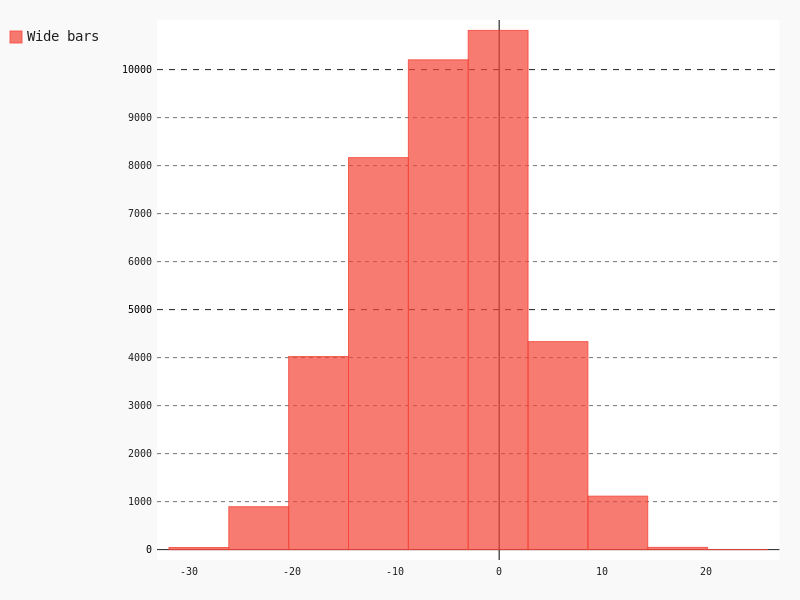

In [67]:
plot_histogram(data = df["score"])

## Interpretación

Cuando se aplica el modelo de regresión lineal obtemos un score del 0.022 esto nos quiere decir que no es un buen modelo ya que nuestros datos predichos no se parecen en lo mas minimo a nuestros datos reales
|